<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [27]:
# Utilice este espacio para escribir el código.

# librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
import os

# Descargar los datos utilizando fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

# Print name faces of the datasets
for name in lfw_people.target_names:
    print(name)

images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names


# Guardo en el datafolder
for i, (image, label) in enumerate(zip(images, labels)):
    person_name = target_names[label].replace(" ", "_")
    numpy_filename = f"data/{person_name}_{i}.npy"
    np.save(numpy_filename, image)  # Save the image as a numpy array

print("Todas las 25 imagénes guardadas")

Alejandro Toledo
Alvaro Uribe
Andre Agassi
Ariel Sharon
Arnold Schwarzenegger
Bill Clinton
Colin Powell
David Beckham
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Gray Davis
Guillermo Coria
Hans Blix
Hugo Chavez
Jack Straw
Jacques Chirac
Jean Chretien
Jennifer Capriati
John Ashcroft
John Negroponte
Juan Carlos Ferrero
Junichiro Koizumi
Kofi Annan
Laura Bush
Lleyton Hewitt
Luiz Inacio Lula da Silva
Mahmoud Abbas
Megawati Sukarnoputri
Nestor Kirchner
Recep Tayyip Erdogan
Ricardo Lagos
Roh Moo-hyun
Rudolph Giuliani
Serena Williams
Silvio Berlusconi
Tom Daschle
Tom Ridge
Tony Blair
Vicente Fox
Vladimir Putin
Images saved successfully in the 'data' folder.


### Procedimiento:

1. Descargo la base de datos de la imágen usando fletch
2. Creo una función que guarde las imagenes como un numpy array considerando el numbre de las personas

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes.

<class 'numpy.ndarray'>
Dimensión: 50 x 37


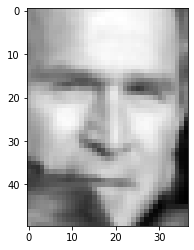

In [40]:
# Verificamos que es un array
print(type(images))

# Intesidad de luz
images[0,:]

# Dimensiones
n,k= image.shape
print("Dimensión:", n, "x", k)

# Vemos la imagen
plt.imshow(image, cmap='gray')
plt.show()

#### Procedimiento:
1. Verificar que es un array para ver que sea un numpy.
2. vemos que cada entrada contiene un número que indica la intensidad de la luz en ese punto:
3. Cargada la imagen y verificado que es un array, verificamos la dimensión
4. graficar con plt.imshow de Matplotlib puede usarse para graficar imágenes

#### Análisis:

#### Conclusión:

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

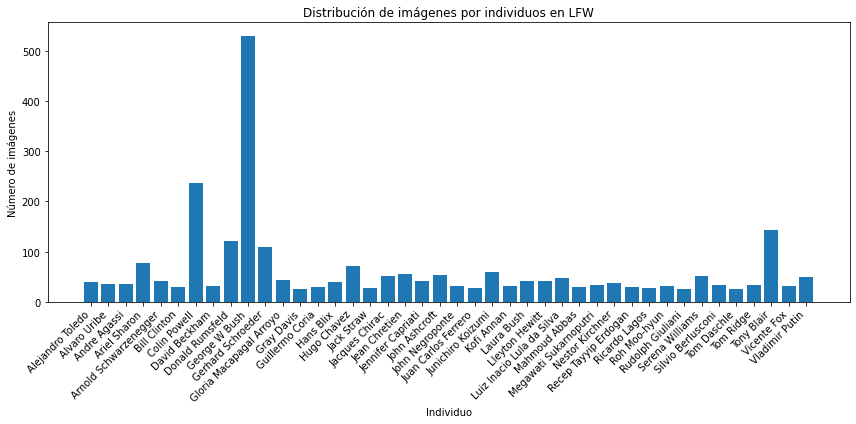

In [51]:
# Utilice este espacio para escribir el código.

# Obtener las etiquetas numéricas de los individuos
target = lfw_people.target

# Contar cuántas imágenes hay para cada individuo
unique_targets, counts = np.unique(target, return_counts=True)

# Obtener los nombres de los individuos a partir de las etiquetas
target_names = lfw_people.target_names

# Crear una gráfica de barras para mostrar la distribución
plt.figure(figsize=(12, 6))
plt.bar(target_names, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Individuo')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por individuos en LFW')
plt.tight_layout()

plt.show()

##### Procedimiento:
1. Obtener las etiquetas numéricas de los individuos
2. Conteo de imágen por label
3. Extraer los nombres de los individuos por etiquetas
4. Creación de gráfica de barras

#### Análisis y conclusión:

- Las personas con más imagenes son George W Bush, Colin Powell, Donald Rumsfeld, Tony Blair.

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Imagenes que pertenecen a Serena Williams: 52


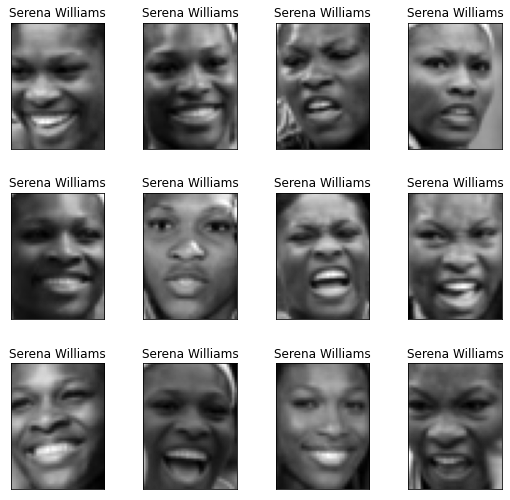

In [49]:
# Utilice este espacio para escribir el código.

# Definición de la galería de imágenes
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Buscamos en el target_names todas las serena williams posibles
serena_williams_index = list(lfw_people.target_names).index('Serena Williams')

# Extraemos las imagenes con sus labels
serena_images = lfw_people.images[lfw_people.target == serena_williams_index]

# Now you have the images of Serena Williams in the `serena_images` variable
print(f"Imagenes que pertenecen a Serena Williams: {serena_images.shape[0]}")

# Grafico las imagenes
serena_titles = ["Serena Williams"] * len(serena_images)
plot_gallery(serena_images, serena_titles, h=50, w=37)
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [ ]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).